<a href="https://colab.research.google.com/github/gigiosbarbr/potifolio-giovane/blob/main/Case_Indentifica%C3%A7%C3%A3o_de_Problemas_cardiacos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1.Importando blibliotecas e o Dataset

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from math import ceil
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
df_heart = pd.read_csv('heart.csv')

# 2.Data Understanding - EDA

- age: Idade (Anos)
- sex: Sexo (1 = Masc e 0 = Fem)
- cp: Nível de dor ( 1 a 4 )
- trestbps: Pressão sanguínea em Repouso
- chol: colesterol em mg/dl:
- fbs: Fasting Blood Sugar (Teste diabético) > 120 mg/dl
- restecg: Eletrocardiogramas em repouso (0,1 ou 2)
- thalach: Ritmo cardíaco
- exang: Exercício físico que gerou Angina
- oldpeak: Depressão de ST induzida por exercício em relação ao
repouso
- slope: Tipo de inclinação do segmento ST de pico do exercício
- ca: número de vasos sanguínios ressaltados (coloridos por
fluoroscopia)
- thal: Talassemia -> 3 = normal; 6 = fixed defect; 7 = reversable
defect

In [ ]:
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Um dataset de 1025 casos, sem presença de valores nulos

In [ ]:
df_heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Setando as variáveis categóricas. A definição de sexo não é uma variável continua.

In [ ]:
df_heart['sex'] = df_heart['sex'].astype('str')

Histograma das variáveis continuas

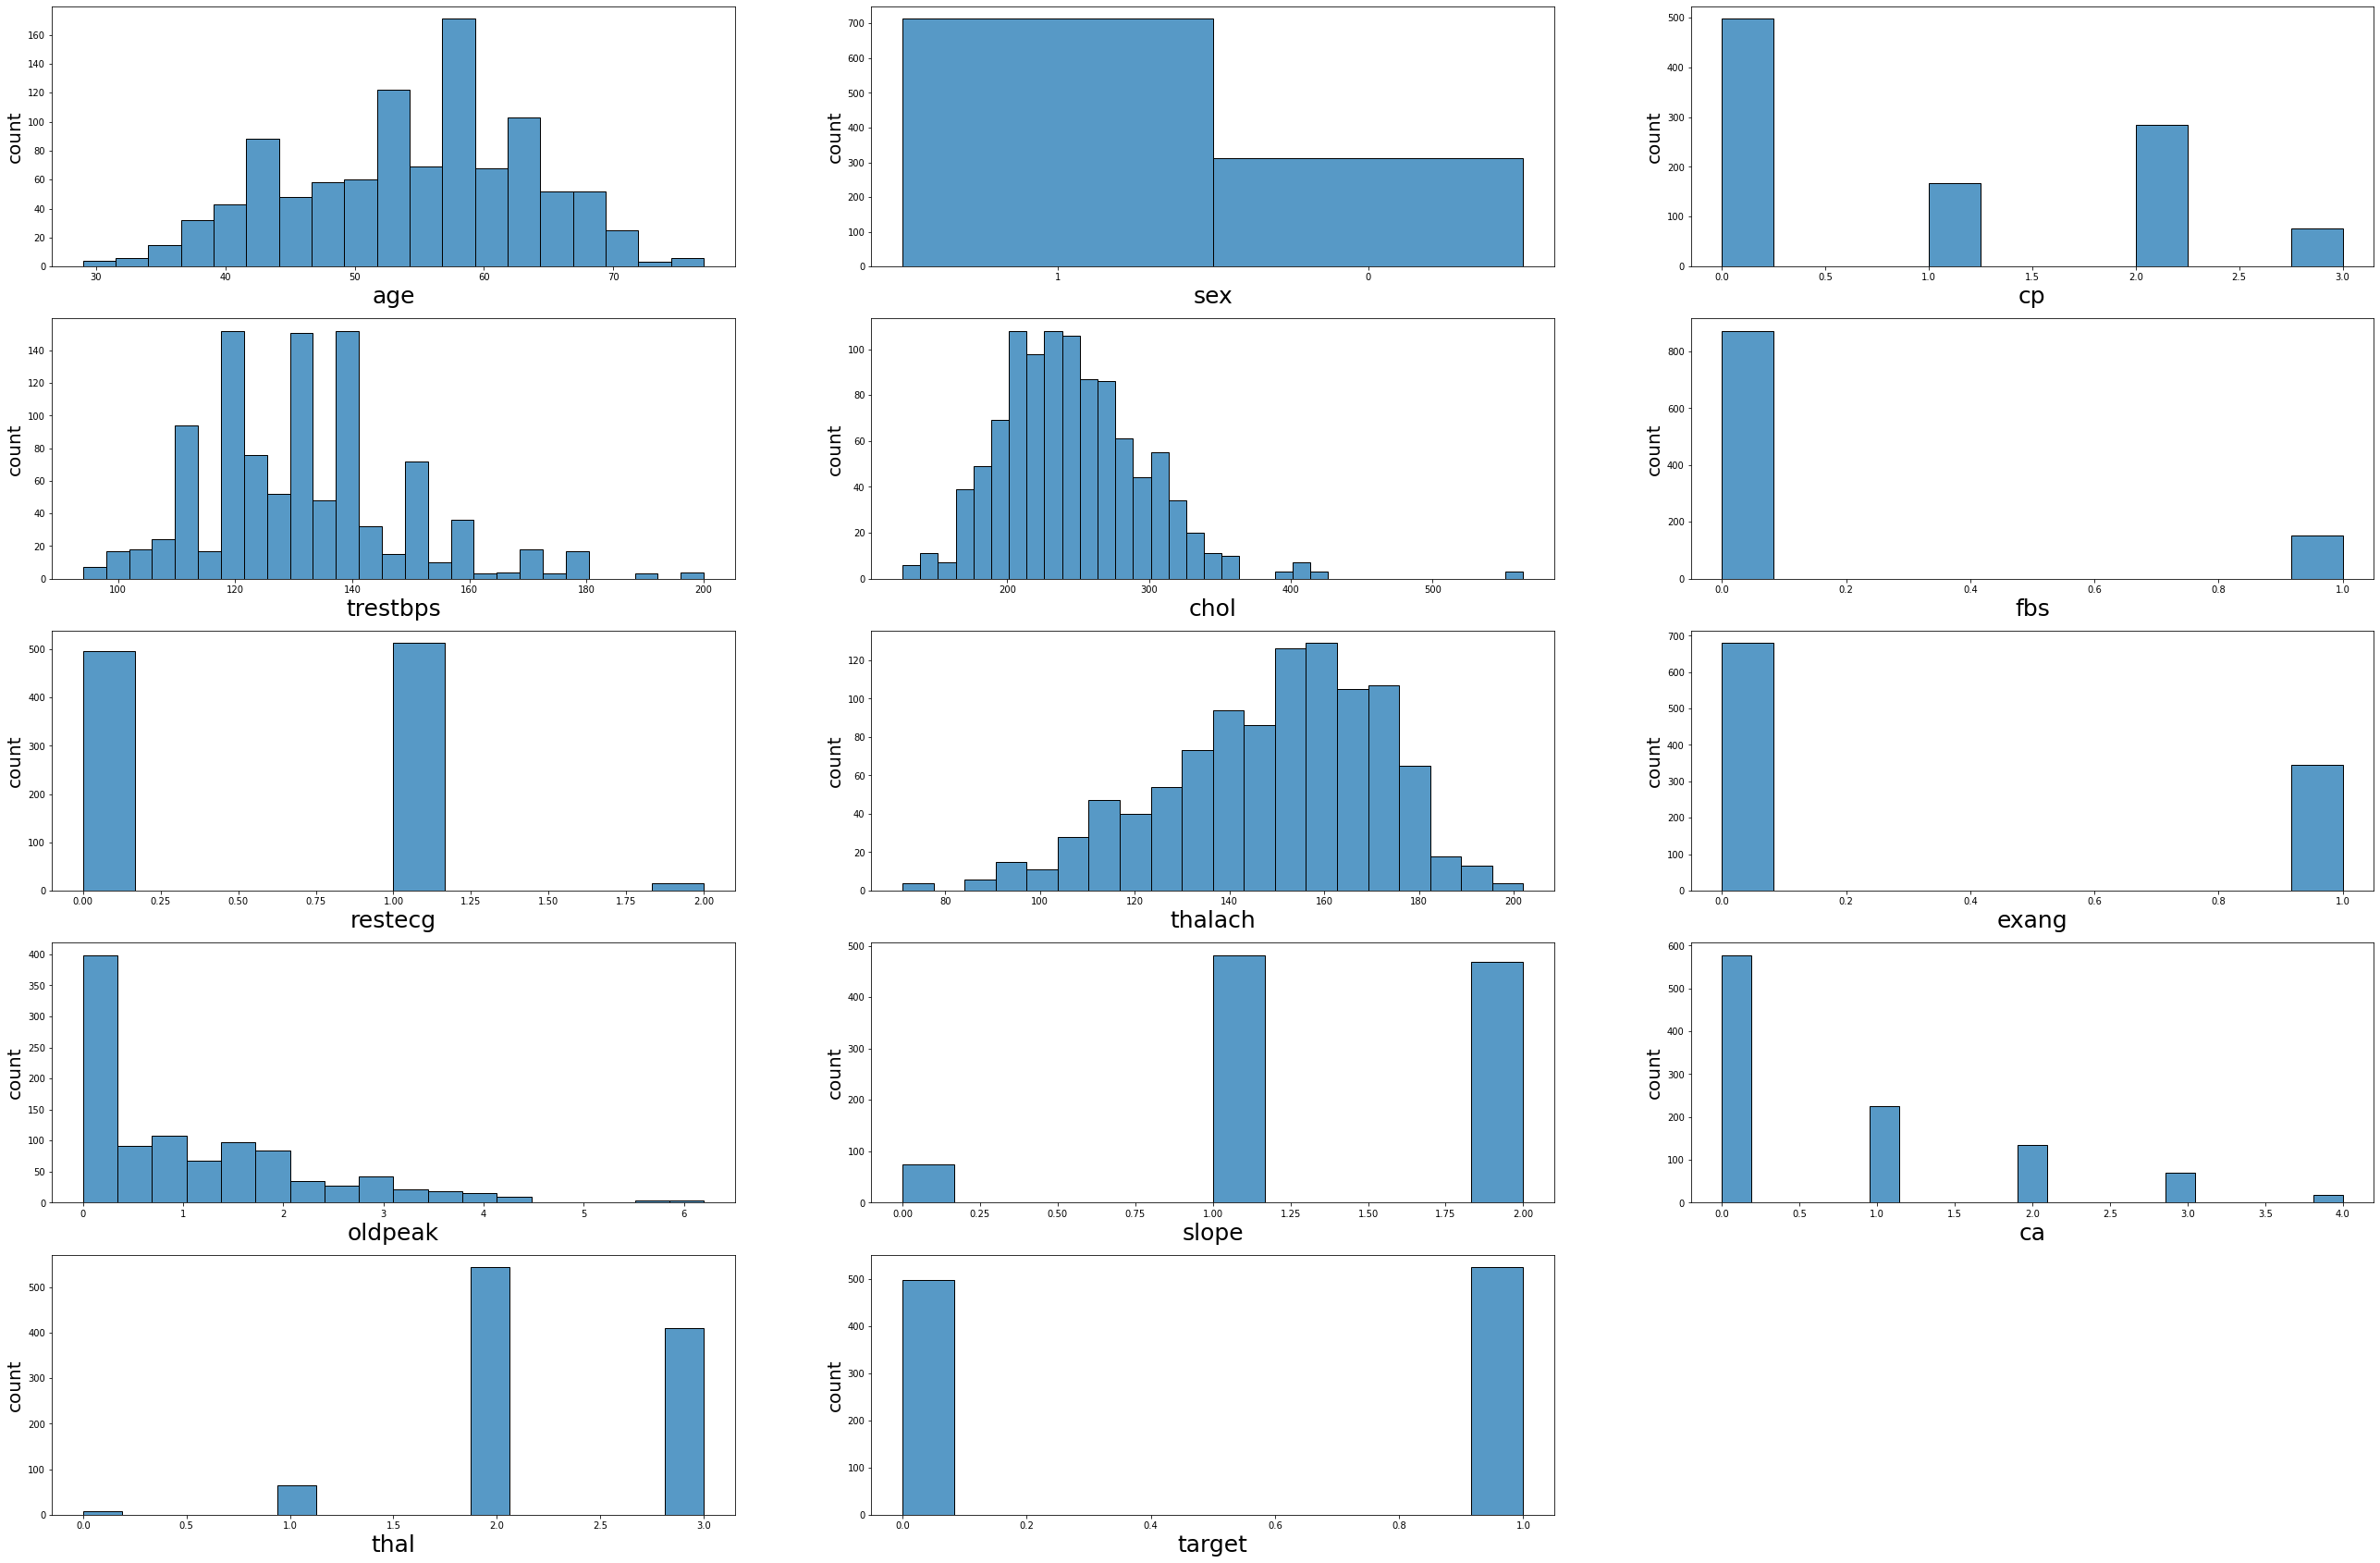

In [ ]:
plt.figure(figsize=(45,30))
for i,col in enumerate(df_heart.columns):
    plt.subplot(5, 3, i+1)
    plt.xlabel(col, fontsize=25)
    plt.ylabel('count', fontsize=20)
    sns.histplot(data = df_heart, x = col)

### Conclusões:

- As maiores concentrações de idade giram a partir dos 50 anos de idade
- Temos muito mais homens que mulheres
- A distribuição de nível de colesterol é visualmente/aproximadamente normal
- fbs ou teste para diabetes é uma informação categórica, não continua
- exang é uma informação categórica, não continua
- slope é uma informação categórica, não continua
- restecg é uma informaçõa categórica, não continua
- A variável thalanch tem um tipo de distribuição visualmente parecida com a função Chi-squared Beta


In [ ]:
col_str = ['fbs',  'slope', 'exang', 'restecg']
for col in col_str:
  df_heart[col] = df_heart[col].astype('str')

# 3.Avaliação de correlação entre as variáveis

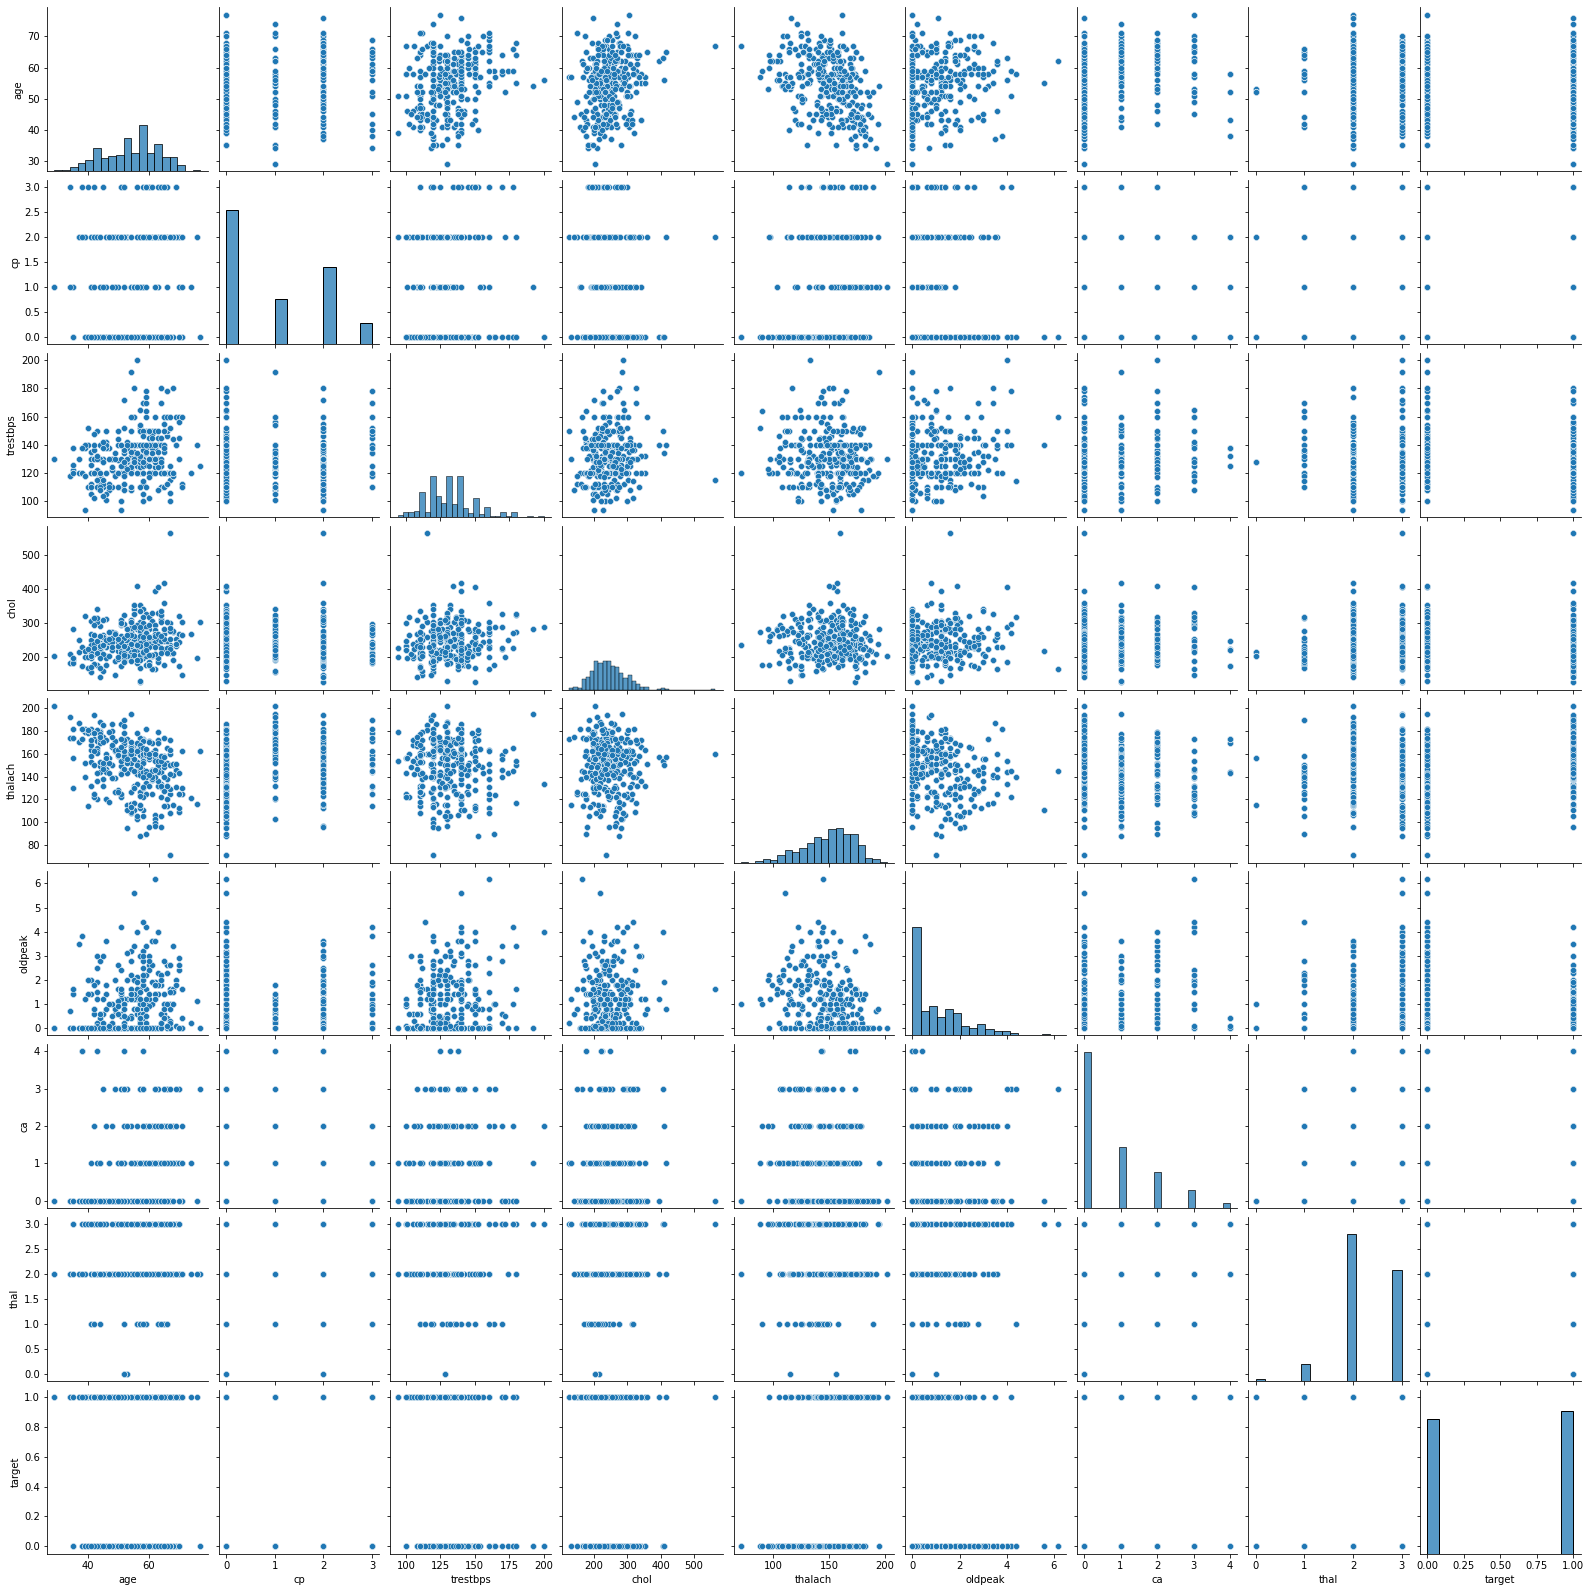

In [ ]:
sns.pairplot(df_heart)

In [ ]:
corr = df_heart.corr()
corr

,age,cp,trestbps,chol,thalach,oldpeak,ca,thal,target
age,1.000000,-0.071966,0.271121,0.219823,-0.390227,0.208137,0.271551,0.072297,-0.229324
cp,-0.071966,1.000000,0.038177,-0.081641,0.306839,-0.174733,-0.176206,-0.163341,0.434854
trestbps,0.271121,0.038177,1.000000,0.127977,-0.039264,0.187434,0.104554,0.059276,-0.138772
chol,0.219823,-0.081641,0.127977,1.000000,-0.021772,0.064880,0.074259,0.100244,-0.099966
thalach,-0.390227,0.306839,-0.039264,-0.021772,1.000000,-0.349796,-0.207888,-0.098068,0.422895
oldpeak,0.208137,-0.174733,0.187434,0.064880,-0.349796,1.000000,0.221816,0.202672,-0.438441
ca,0.271551,-0.176206,0.104554,0.074259,-0.207888,0.221816,1.000000,0.149014,-0.382085
thal,0.072297,-0.163341,0.059276,0.100244,-0.098068,0.202672,0.149014,1.000000,-0.337838
target,-0.229324,0.434854,-0.138772,-0.099966,0.422895,-0.438441,-0.382085,-0.337838,1.000000


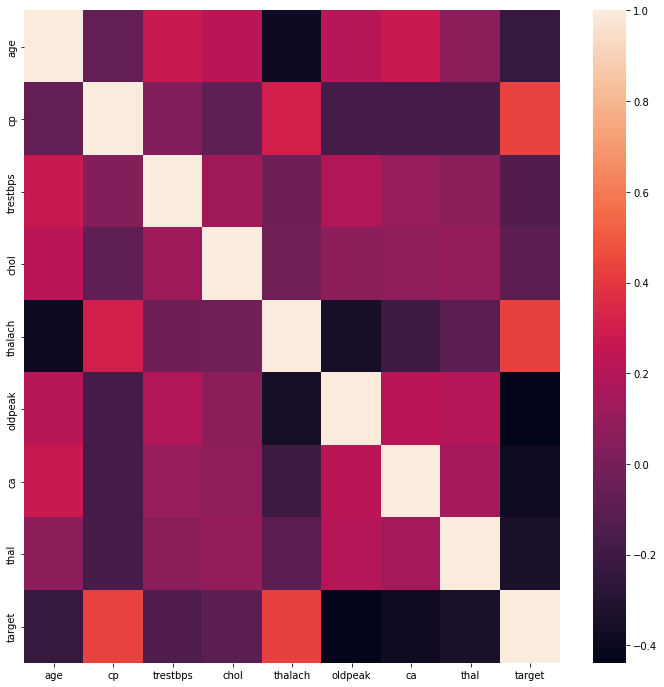

In [ ]:
plt.figure(figsize = (12,12))
sns.heatmap(corr)

Podemos ver uma leve correlação das variáveis idependentes com a variável target, principalmente a oldpeak, cp e thalach.


# 4.Identificação de outliers

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df_heart.select_dtypes(include=numerics)

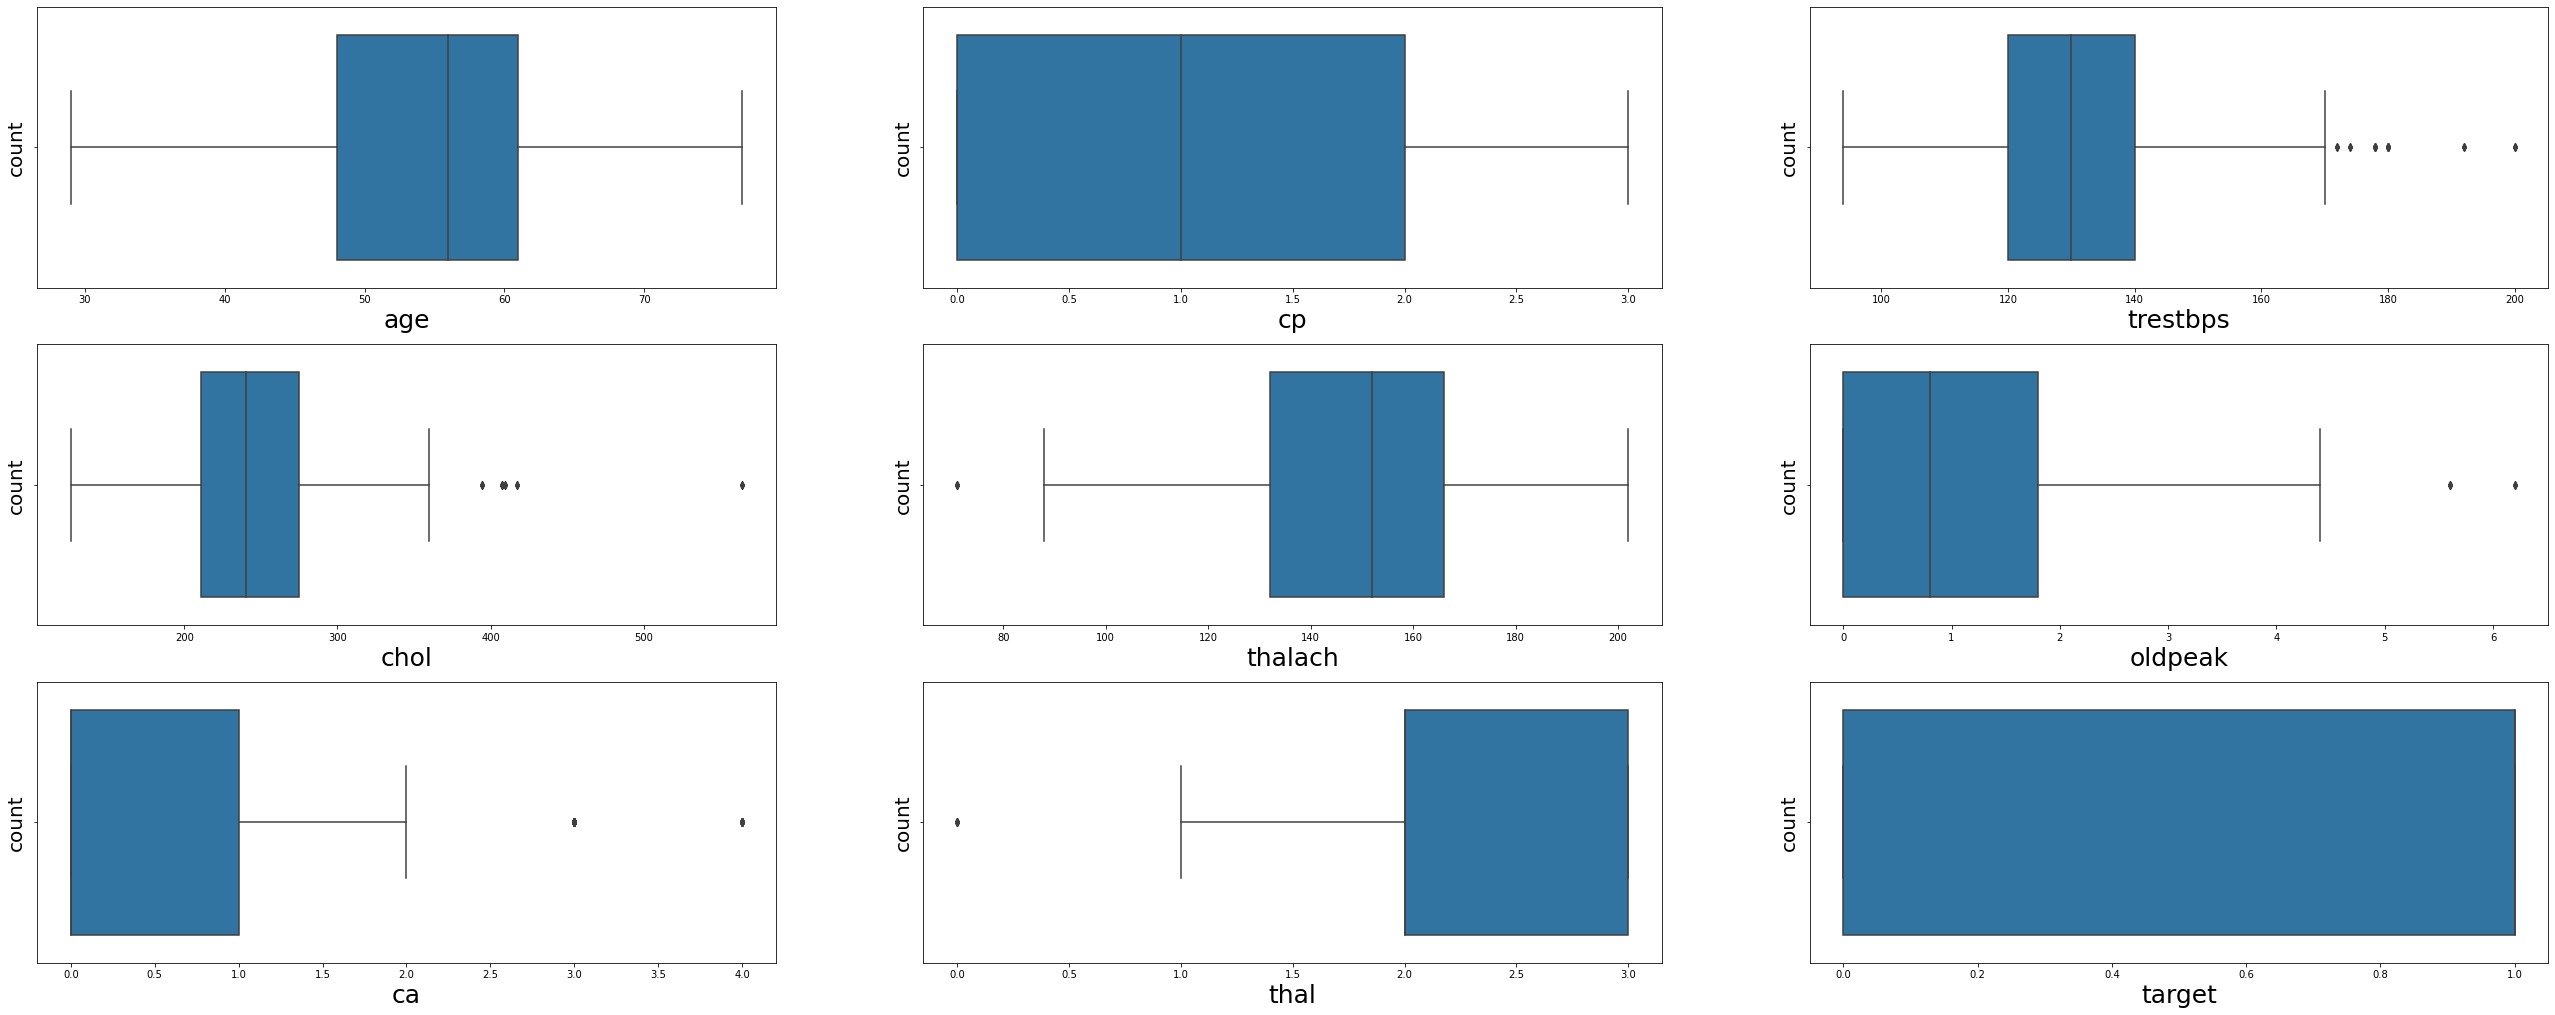

In [ ]:
plt.figure(figsize=(45,30))
for i,col in enumerate(newdf.columns):
    plt.subplot(5, 3, i+1)
    plt.xlabel(col, fontsize=25)
    plt.ylabel('count', fontsize=20)
    sns.boxplot(data = newdf, x = col)

Vamos usar o intervalo interquartil como retirador de outliers. O próprio gráfico boxplot acima mostra a pequena quantidade de casos assim. Os valores serão substituidos pela mediana.

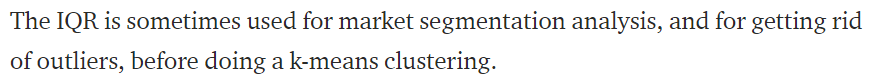

In [ ]:
for col in df_heart.columns:
  if col in newdf.columns:
    IQ1 = df_heart[col].quantile(0.25)
    IQ3 = df_heart[col].quantile(0.75)
    IIq = IQ3 - IQ1
    mode = df_heart[col].mode()
    for k,i in enumerate(df_heart[col]):
      if i <= (IQ1 - 1.5*IIq) or i >= (IQ3 + 1.5*IIq):
        df_heart[col][k] =  mode


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = df_heart.select_dtypes(include=numerics)

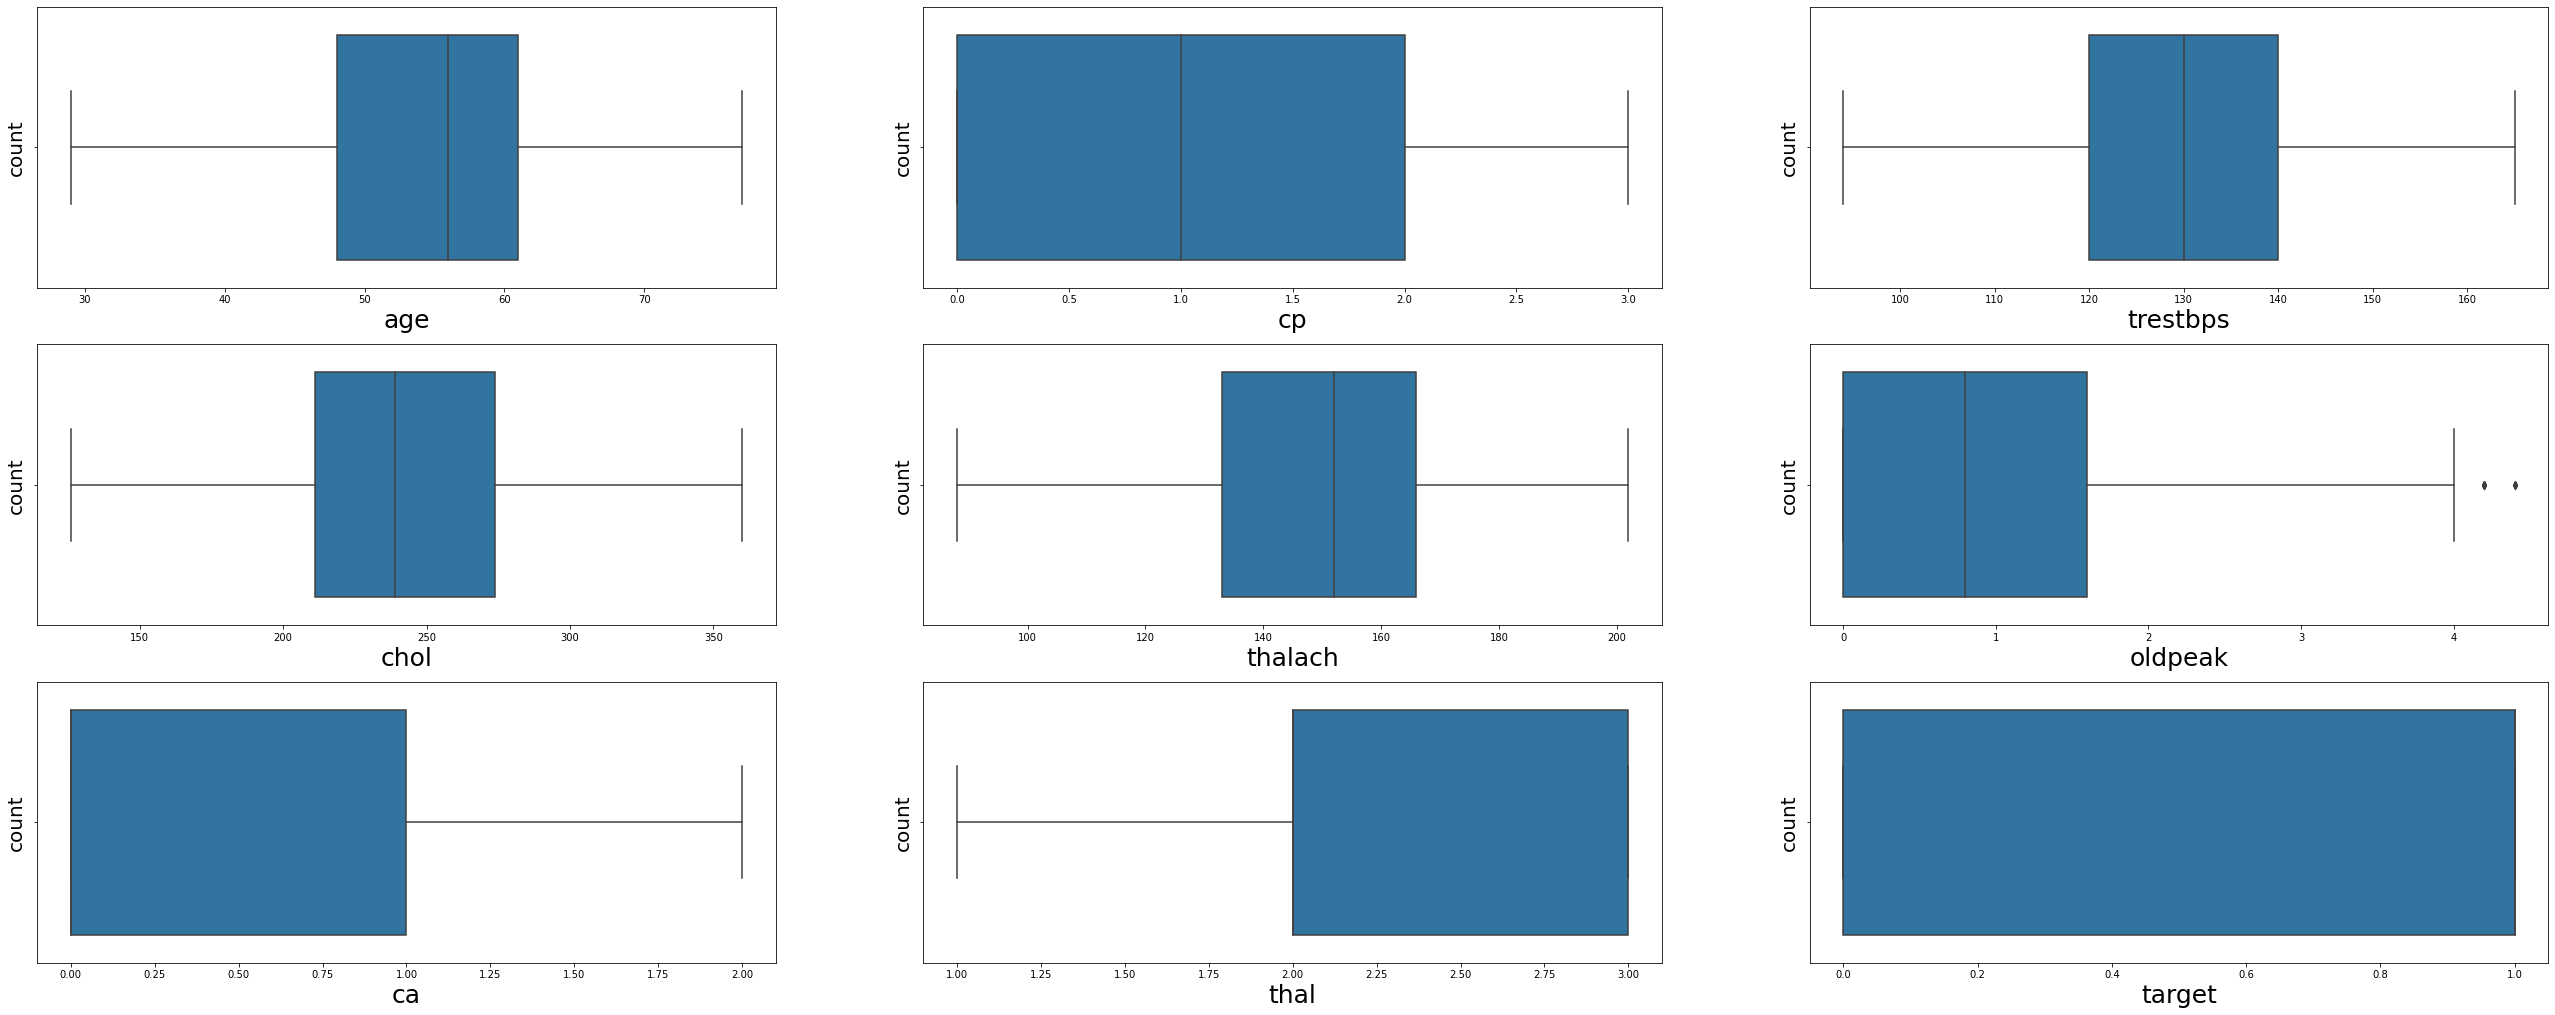

In [ ]:
plt.figure(figsize=(45,30))
for i,col in enumerate(newdf.columns):
    plt.subplot(5, 3, i+1)
    plt.xlabel(col, fontsize=25)
    plt.ylabel('count', fontsize=20)
    sns.boxplot(data = newdf, x = col)

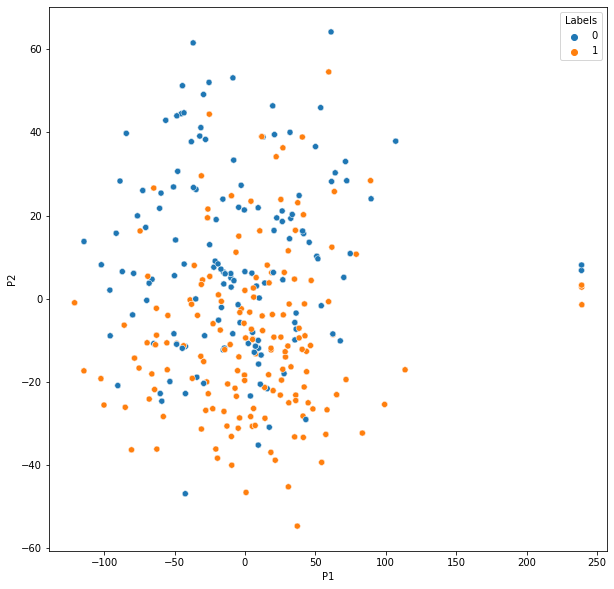

In [568]:
pca = PCA(n_components=2)
pca_transform = pca.fit_transform(df_heart.drop(['target'], axis = 1).fillna(0))
pca_transform
pca_transform = pd.DataFrame(pca_transform, columns = ['P1', 'P2'])
pca_transform['Labels'] = df_heart['target']
plt.figure(figsize=(10,10))
sns.scatterplot(data = pca_transform, x= 'P1', y = 'P2', hue= 'Labels')
plt.show()

In [559]:
print(pca.explained_variance_ratio_)
P1, P2 = pca.get_params

[0.78649284 0.13906438]


ValueError: ignored

# 5.Preparação da base de Treino e teste

In [ ]:
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212.0,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203.0,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174.0,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203.0,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294.0,1,1,106,0,1.9,1,0,2,0


In [ ]:
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   object 
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1009 non-null   float64
 5   fbs       1025 non-null   object 
 6   restecg   1025 non-null   object 
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   object 
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   object 
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(2), int64(7), object(5)
memory usage: 112.2+ KB


### Definindo a variável Target

In [ ]:
y = df_heart['target']

### Separando as variáveis númericas e categoricas

In [ ]:
Categorical_data = list(df_heart.columns.drop(newdf.columns))

In [ ]:
Categorical_data

['sex', 'fbs', 'restecg', 'exang', 'slope']

In [ ]:
Categorical_data = pd.get_dummies(df_heart[Categorical_data])

Aqui dummificamos as variáveis categóricas e booleanas

In [ ]:
 Categorical_data

,sex_0,sex_1,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2
0,0,1,1,0,0,1,0,1,0,0,0,1
1,0,1,0,1,1,0,0,0,1,1,0,0
2,0,1,1,0,0,1,0,0,1,1,0,0
3,0,1,1,0,0,1,0,1,0,0,0,1
4,1,0,0,1,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1020,0,1,1,0,0,1,0,0,1,0,0,1
1021,0,1,1,0,1,0,0,0,1,0,1,0
1022,0,1,1,0,1,0,0,0,1,0,1,0
1023,1,0,1,0,1,0,0,1,0,0,0,1


In [ ]:
df = pd.concat([newdf, Categorical_data], axis =1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1025 non-null   int64  
 1   cp         1025 non-null   int64  
 2   trestbps   1025 non-null   int64  
 3   chol       1009 non-null   float64
 4   thalach    1025 non-null   int64  
 5   oldpeak    1025 non-null   float64
 6   ca         1025 non-null   int64  
 7   thal       1025 non-null   int64  
 8   target     1025 non-null   int64  
 9   sex_0      1025 non-null   uint8  
 10  sex_1      1025 non-null   uint8  
 11  fbs_0      1025 non-null   uint8  
 12  fbs_1      1025 non-null   uint8  
 13  restecg_0  1025 non-null   uint8  
 14  restecg_1  1025 non-null   uint8  
 15  restecg_2  1025 non-null   uint8  
 16  exang_0    1025 non-null   uint8  
 17  exang_1    1025 non-null   uint8  
 18  slope_0    1025 non-null   uint8  
 19  slope_1    1025 non-null   uint8  
 20  slope_2 

In [ ]:
df['chol'].fillna(df['chol'].mean(), inplace = True)

In [ ]:
df.head()

,age,cp,trestbps,chol,thalach,oldpeak,ca,thal,target,sex_0,...,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2
0,52,0,125,212.0,168,1.0,2,3,0,0,...,1,0,0,1,0,1,0,0,0,1
1,53,0,140,203.0,155,3.1,0,3,0,0,...,0,1,1,0,0,0,1,1,0,0
2,70,0,145,174.0,125,2.6,0,3,0,0,...,1,0,0,1,0,0,1,1,0,0
3,61,0,148,203.0,161,0.0,1,3,0,0,...,1,0,0,1,0,1,0,0,0,1
4,62,0,138,294.0,106,1.9,0,2,0,1,...,0,1,0,1,0,1,0,0,1,0


Depois de unificar os dados dummificados e originais podemos fazer o split das bases de teste e treino. Depois disso também podemos fazer a standartização da base.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1025 non-null   int64  
 1   cp         1025 non-null   int64  
 2   trestbps   1025 non-null   int64  
 3   chol       1025 non-null   float64
 4   thalach    1025 non-null   int64  
 5   oldpeak    1025 non-null   float64
 6   ca         1025 non-null   int64  
 7   thal       1025 non-null   int64  
 8   target     1025 non-null   int64  
 9   sex_0      1025 non-null   uint8  
 10  sex_1      1025 non-null   uint8  
 11  fbs_0      1025 non-null   uint8  
 12  fbs_1      1025 non-null   uint8  
 13  restecg_0  1025 non-null   uint8  
 14  restecg_1  1025 non-null   uint8  
 15  restecg_2  1025 non-null   uint8  
 16  exang_0    1025 non-null   uint8  
 17  exang_1    1025 non-null   uint8  
 18  slope_0    1025 non-null   uint8  
 19  slope_1    1025 non-null   uint8  
 20  slope_2 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, y, random_state = 42, test_size = 0.3)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 717 entries, 1020 to 860
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        717 non-null    int64  
 1   cp         717 non-null    int64  
 2   trestbps   717 non-null    int64  
 3   chol       717 non-null    float64
 4   thalach    717 non-null    int64  
 5   oldpeak    717 non-null    float64
 6   ca         717 non-null    int64  
 7   thal       717 non-null    int64  
 8   target     717 non-null    int64  
 9   sex_0      717 non-null    uint8  
 10  sex_1      717 non-null    uint8  
 11  fbs_0      717 non-null    uint8  
 12  fbs_1      717 non-null    uint8  
 13  restecg_0  717 non-null    uint8  
 14  restecg_1  717 non-null    uint8  
 15  restecg_2  717 non-null    uint8  
 16  exang_0    717 non-null    uint8  
 17  exang_1    717 non-null    uint8  
 18  slope_0    717 non-null    uint8  
 19  slope_1    717 non-null    uint8  
 20  slope_2

In [ ]:
X_train.shape

(717, 21)

In [ ]:
X_train.reset_index(drop=  True, inplace = True)
X_test.reset_index(drop=  True, inplace = True)
y_train.reset_index(drop=  True, inplace = True)
y_test.reset_index(drop=  True, inplace = True)

In [ ]:
X_train.head()

,age,cp,trestbps,chol,thalach,oldpeak,ca,thal,target,sex_0,...,fbs_0,fbs_1,restecg_0,restecg_1,restecg_2,exang_0,exang_1,slope_0,slope_1,slope_2
0,59,1,140,221.0,164,0.0,0,2,1,0,...,1,0,0,1,0,0,1,0,0,1
1,58,0,128,216.0,131,2.2,0,3,0,0,...,1,0,1,0,0,0,1,0,1,0
2,44,2,118,242.0,149,0.3,1,2,1,1,...,1,0,0,1,0,1,0,0,1,0
3,50,2,140,233.0,163,0.6,1,3,0,0,...,1,0,0,1,0,1,0,0,1,0
4,43,2,122,213.0,165,0.2,0,2,1,1,...,1,0,0,1,0,1,0,0,1,0


Criando um pipe de standartização

In [ ]:
def standard(X):
  df_numeric1 = X.drop(list(Categorical_data.columns), axis = 1)
  df_dummie =  X[list(Categorical_data.columns)]

  normalizador = StandardScaler()
  df_numeric = normalizador.fit_transform(df_numeric1)

  df_scaled = pd.concat([pd.DataFrame(df_numeric, columns = df_numeric1.columns), df_dummie], axis =1)

  return df_scaled

Standartizando a base de treino

In [ ]:
X_train = standard(X_train)

In [ ]:
X_test = standard(X_test)

# 6.Importando os modelos de Regressão Pro

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

### 6.1.KNN Classifier

In [ ]:
KNN = KNeighborsClassifier()
KNN = KNN.fit(X_train, y_train)
y_pred_test = KNN.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


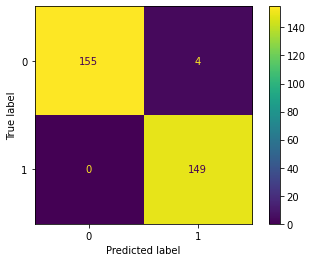

In [ ]:
plot_confusion_matrix(KNN,X_test, y_test)

In [ ]:
acuracidade = accuracy_score(y_test, y_pred_test)
print('A Acuracidade foi de: ', acuracidade)

A Acuracidade foi de:  0.987012987012987
